In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyecharts import Bar, Line, Overlap,WordCloud
from pylab import mpl

mpl.rcParams['font.sans-serif'] = ['SimHei']  #解决seaborn中文字体显示问题
plt.rc('figure', figsize=(10, 10))  #把plt默认的图片size调大一点
%matplotlib inline

ERROR:lml.utils:failed to import pyecharts_snapshot
Traceback (most recent call last):
  File "/Users/abner/opt/anaconda3/lib/python3.7/site-packages/lml/utils.py", line 43, in do_import
    plugin_module = __import__(plugin_module_name)
ModuleNotFoundError: No module named 'pyecharts_snapshot'


In [2]:
data = pd.read_csv('NationalNames.csv')

In [3]:
data.head()

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924665 entries, 0 to 1924664
Data columns (total 5 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Name    object
 2   Year    int64 
 3   Gender  object
 4   Count   int64 
dtypes: int64(3), object(2)
memory usage: 73.4+ MB


## 1. 2010-2017年，Top15的男生、女生英文名

### - 男生

In [7]:
top15_boy = data.loc[(data['Year'].isin(list(range(2010,2018)))) & (data['Gender'] == 'M'), :].groupby('Name').Count.sum().nlargest(15)
boy_total = data.loc[(data['Year'].isin(list(range(2010,2018)))) & (data['Gender'] == 'M'), :].groupby('Name').Count.sum().sum()
top15_boy

Name
Noah         145195
Jacob        140091
Mason        133535
Liam         133019
William      131241
Ethan        125561
Michael      122265
Alexander    118376
James        112387
Daniel       111658
Elijah       110075
Aiden        109852
Jayden       109122
Benjamin     107648
Matthew      105429
Name: Count, dtype: int64

In [26]:
name = list(top15_boy.index)
value = list(top15_boy.values)
wordcloud = WordCloud(width=800, height=450,background_color='#f2eada')  # feeeed
wordcloud.add("", name, value, word_size_range=[20, 100],shape='diamond')
wordcloud

In [9]:
data_top15_boy = data.loc[(data['Year'].isin(list(range(2010,2018)))) & (data['Gender'] == 'M') & 
                          (data['Name']).isin(list(top15_boy.index)), :]
data_top15_boy

,Id,Name,Year,Gender,Count
1677731,1677732,Jacob,2010,M,22117
1677732,1677733,Ethan,2010,M,18000
1677733,1677734,Michael,2010,M,17342
1677734,1677735,Jayden,2010,M,17171
1677735,1677736,William,2010,M,17048
...,...,...,...,...,...
1910518,1910519,Ethan,2017,M,12389
1910519,1910520,Daniel,2017,M,11640
1910520,1910521,Matthew,2017,M,11611
1910521,1910522,Aiden,2017,M,11259


In [12]:
data_top15_boy.sort_values(by = ['Year', 'Count'], ascending=False, inplace=True)
data_top15_boy

/Users/abner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Id,Name,Year,Gender,Count
1910505,1910506,Liam,2017,M,18728
1910506,1910507,Noah,2017,M,18326
1910507,1910508,William,2017,M,14904
1910508,1910509,James,2017,M,14232
1910510,1910511,Benjamin,2017,M,13733
...,...,...,...,...,...
1677746,1677747,Matthew,2010,M,14126
1677748,1677749,Elijah,2010,M,13891
1677749,1677750,James,2010,M,13877
1677752,1677753,Benjamin,2010,M,12428


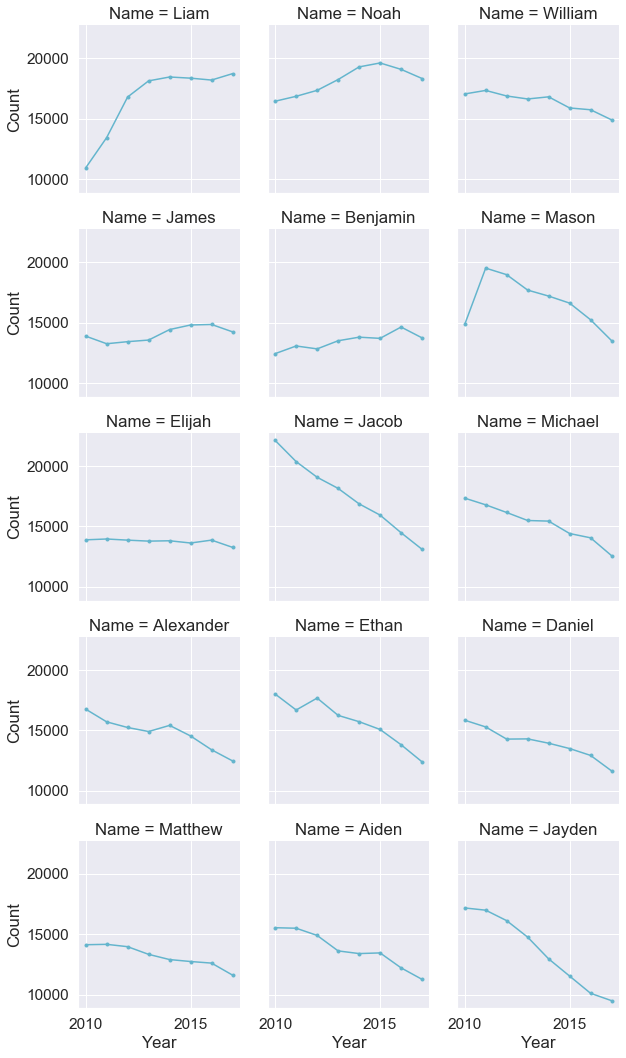

In [47]:
sns.set(font_scale=1.4)
g = sns.FacetGrid(data_top15_boy, col="Name", col_wrap=3)

g = g.map(plt.plot, "Year", "Count",color="c",marker=".")

### - 女生

In [31]:
top15_girl = data.loc[(data['Year'].isin(list(range(2010,2018)))) & (data['Gender'] == 'F'), :].groupby('Name').Count.sum().nlargest(15)

In [32]:
list(data.loc[(data['Year'].isin(list(range(2010,2018)))) & (data['Gender'] == 'F'), :].groupby('Name').Count.sum().nlargest(30).index)

['Emma',
 'Sophia',
 'Olivia',
 'Isabella',
 'Ava',
 'Mia',
 'Emily',
 'Abigail',
 'Madison',
 'Elizabeth',
 'Charlotte',
 'Chloe',
 'Ella',
 'Amelia',
 'Avery',
 'Sofia',
 'Evelyn',
 'Harper',
 'Addison',
 'Grace',
 'Natalie',
 'Victoria',
 'Lily',
 'Aubrey',
 'Lillian',
 'Zoey',
 'Hannah',
 'Brooklyn',
 'Layla',
 'Samantha']

In [33]:
name = list(top15_girl.index)
value = list(top15_girl.values)
wordcloud = WordCloud(width=800, height=500,background_color='#feeeed')  # feeeed
wordcloud.add("", name, value, word_size_range=[20, 100],shape='diamond')
wordcloud

/Users/abner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


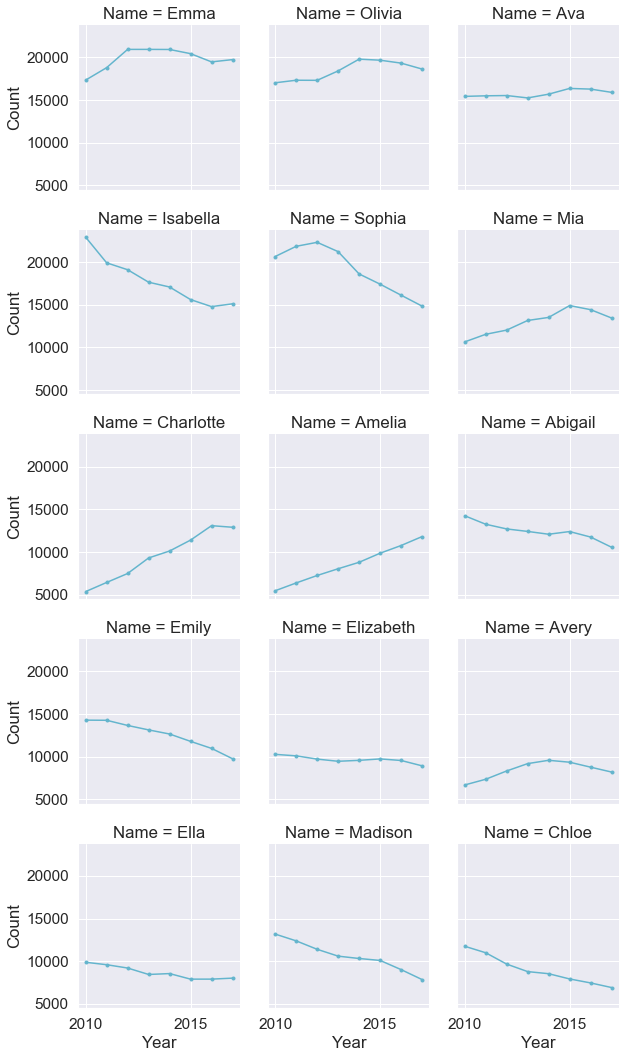

In [49]:
data_top15_girl = data.loc[(data['Year'].isin(list(range(2010,2018)))) & (data['Gender'] == 'F') & 
                          (data['Name']).isin(list(top15_girl.index)), :]

data_top15_girl.sort_values(by = ['Year', 'Count'], ascending=False, inplace=True)

sns.set(font_scale=1.4)
g = sns.FacetGrid(data_top15_girl, col="Name", col_wrap=3)

g = g.map(plt.plot, "Year", "Count",color="c",marker=".")

## 2. 每个年代，最流行的英文名字
- 1920-2017

In [13]:
data_decades = data[data['Year']>=1920]
data_decades['decade'] = pd.cut(data_decades['Year'], [1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2018], 
                                labels = ['20s','30s','40s', '50s','60s','70s','80s','90s','00s','10s'],right=False)
data_decades

/Users/abner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Id,Name,Year,Gender,Count,decade
169455,169456,Mary,1920,F,70980,20s
169456,169457,Dorothy,1920,F,36643,20s
169457,169458,Helen,1920,F,35097,20s
169458,169459,Margaret,1920,F,27997,20s
169459,169460,Ruth,1920,F,26101,20s
...,...,...,...,...,...,...
1924660,1924661,Zykai,2017,M,5,10s
1924661,1924662,Zykeem,2017,M,5,10s
1924662,1924663,Zylin,2017,M,5,10s
1924663,1924664,Zylis,2017,M,5,10s


In [14]:
decade = data_decades.groupby(['decade', 'Gender', 'Name']).Count.sum().groupby(level=[0,1]).nlargest(1)
decade

decade  Gender  decade  Gender  Name    
20s     F       20s     F       Mary        701746.0
        M       20s     M       Robert      576362.0
30s     F       30s     F       Mary        572942.0
        M       30s     M       Robert      590716.0
40s     F       40s     F       Mary        640023.0
        M       40s     M       James       795660.0
50s     F       50s     F       Mary        625558.0
        M       50s     M       James       843489.0
60s     F       60s     F       Lisa        496972.0
        M       60s     M       Michael     833254.0
70s     F       70s     F       Jennifer    581772.0
        M       70s     M       Michael     707647.0
80s     F       80s     F       Jessica     469472.0
        M       80s     M       Michael     663690.0
90s     F       90s     F       Jessica     303086.0
        M       90s     M       Michael     462314.0
00s     F       00s     F       Emily       223658.0
        M       00s     M       Jacob       273793.0
10s  

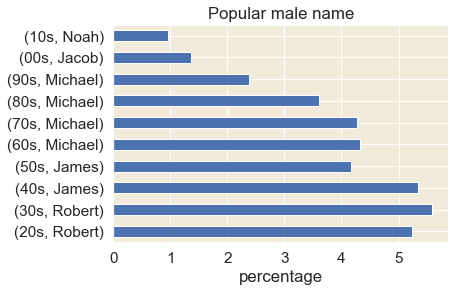

In [57]:
decade_boy_count = decade.iloc[decade.index.get_level_values(3)=='M'].reset_index(level=[0,1,3], drop=True)
decade_boy_total = data_decades[data_decades['Gender']=='M'].groupby('decade').Count.sum()
decade_boy_pct = (decade_boy_count/decade_boy_total*100).round(2)
ax = decade_boy_pct.plot.barh(title='Popular male name')
ax.set_ylabel('')
ax.set_xlabel('percentage')

Text(0.5, 0, 'percentage')

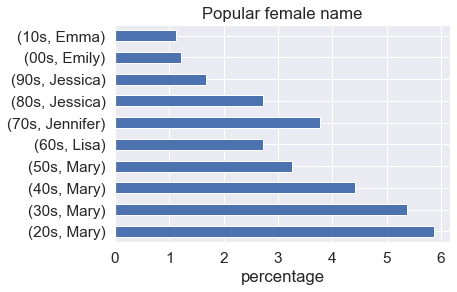

In [58]:
decade_girl_count = decade.iloc[decade.index.get_level_values(3)=='F'].reset_index(level=[0,1,3], drop=True)
decade_girl_total = data_decades[data_decades['Gender']=='F'].groupby('decade').Count.sum()
decade_girl_pct = (decade_girl_count/decade_girl_total*100).round(2)
ax = decade_girl_pct.plot.barh(title='Popular female name')
ax.set_ylabel('')
ax.set_xlabel('percentage')

## 3. 影响美国人取名的因素：体育明星、电视明星

In [125]:
from pyecharts import Overlap
def name_trend(name, data, gender=['M','F'], year=1920, dodge = 500):
    if isinstance(gender, str):
        name_data = data[(data['Name'] == name)&(data['Gender']==gender)&(data['Year']>=year)]
        attr = list(name_data['Year'].values)
        bar = Bar(name)
        bar.add("", attr, list(name_data['Count'].values), mark_line=["average"], mark_point=["max", "min"],
               legend_text_size=18,xaxis_label_textsize=18,yaxis_label_textsize=18)
        line = Line()
        line.add("", attr, list(name_data['Count'].values + dodge))
        
    else:
        name_data = data[(data['Name'] == name)&(data['Year']>=year)]
        attr = list(range(year, 2018))
        v1 = name_data[name_data['Gender']==gender[0]].Count.values
        v2 = name_data[name_data['Gender']==gender[1]].Count.values
        bar = Bar(name)
        bar.add("男", attr, list(v1), legend_text_size=18,xaxis_label_textsize=18,yaxis_label_textsize=18)
        bar.add("女", attr, list(v2), legend_text_size=18,xaxis_label_textsize=18,yaxis_label_textsize=18)
        line = Line()
        line.add("", attr, list(v1 + dodge))
        line.add("", attr, list(v2 + dodge))
    
    overlap = Overlap()
    overlap.add(bar)
    overlap.add(line)
    return overlap

- 体育明星：Jordan, Kobe, Lebron

In [126]:
name_trend('Jordan',data,gender='M',year=1960)

In [75]:
name_trend('Kobe',data,gender='M',year=1920, dodge=100)

- 影视明星：Emma, Scarlett

In [76]:
name_trend('Emma',data,gender='F',year=1980)

In [77]:
name_trend('Scarlett',data,gender='F',year=1980, dodge=200)

In [78]:
name_trend('Chandler',data,year=1976, dodge=100)

In [79]:
name_trend('Taylor',data,year=1976, dodge=100)

In [80]:
name_trend('Riley', data,year=1976, dodge=100)

## 4. 为什么同一发音的名字，有很多不同的拼写变体？ 
- Catherine/Katharine
[C|k]ath(.*)

In [81]:
Catherine = data['Name'][data['Name'].str.contains('^[C|K]ath(.*)')].unique()

/Users/abner/opt/anaconda3/lib/python3.7/site-packages/pandas/core/strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [82]:
Catherine_data = data[data['Name'].isin(Catherine)].groupby('Name').Count.sum()

In [83]:
name = list(Catherine_data.index)
value = list(Catherine_data.values)
wordcloud = WordCloud(width=1000, height=600,background_color='#feeeed')  # feeeed
wordcloud.add("", name, value, word_size_range=[20, 100],shape='diamond')
wordcloud

In [84]:
Emily = data['Name'][data['Name'].str.contains('Emil(.*)')].unique()

In [85]:
Emily_data = data[data['Name'].isin(Emily)].groupby('Name').Count.sum()

In [86]:
name = list(Emily_data.index)
value = list(Emily_data.values)
wordcloud = WordCloud(width=1000, height=600,background_color='#feeeed')  # feeeed
wordcloud.add("", name, value, word_size_range=[20, 100],shape='diamond')
wordcloud

## 5. 一些具有特殊含义的名字，有多少人取？

In [87]:
def name_trend2(name, data, gender, dodge=100):
    name_data = data[(data['Name']==name)&(data['Gender']==gender)]
    attr = list(name_data['Year'].values)
    v1 = name_data['Count'].values

    bar = Bar(name)
    bar.add("", attr, list(v1), legend_text_size=18,xaxis_label_textsize=18,yaxis_label_textsize=18)
    
    line = Line()
    line.add("", attr, list(v1 + dodge))
    
    overlap = Overlap()
    overlap.add(bar)
    overlap.add(line)
    return overlap

In [89]:
name_trend2('Dong', data, gender='M', dodge=1)

In [90]:
name_trend2('Cherry',data,gender='F', dodge=10)

## 6. 一些特殊的名字

In [91]:
class Solution:
    # @return a string
    def getlongestpalindrome(self, s, l, r):
        while l >= 0 and r < len(s) and s[l] == s[r]:
            l -= 1; r += 1
        return s[l+1 : r]
    def longestPalindrome(self, s):
        palindrome = ''
        for i in range(len(s)):
            len1 = len(self.getlongestpalindrome(s, i, i))
            if len1 > len(palindrome): palindrome = self.getlongestpalindrome(s, i, i)
            len2 = len(self.getlongestpalindrome(s, i, i + 1))
            if len2 > len(palindrome): palindrome = self.getlongestpalindrome(s, i, i + 1)
        return True if len(palindrome) > 5 else False

In [92]:
a = Solution()

In [93]:
a.longestPalindrome('alfrederfl')

True

In [94]:
all_name = data['Name'].unique()

In [95]:
palindrome_name = []
for name in all_name:
    if a.longestPalindrome(name):
        palindrome_name.append(name)

In [96]:
palindrome_data = data[data['Name'].isin(palindrome_name)].groupby('Name').Count.sum()

In [97]:
name = list(palindrome_data.index)
value = list(palindrome_data.values)
wordcloud = WordCloud(width=1000, height=600,background_color='#feeeed')  # feeeed
wordcloud.add("", name, value, word_size_range=[20, 100],shape='diamond')
wordcloud